In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('demo-Extreme-Gradient-Boosting_EN.csv', sep=';', decimal=',')
print(df)

     CONTERFEIT  LENGTH   LEFT  RIGHT  BOTTOM   TOP
0             0   214.8  131.0  131.1     9.0   9.7
1             0   214.6  129.7  129.7     8.1   9.5
2             0   214.8  129.7  129.7     8.7   9.6
3             0   214.8  129.7  129.6     7.5  10.4
4             0   215.0  129.6  129.7    10.4   7.7
..          ...     ...    ...    ...     ...   ...
195           1   215.0  130.4  130.3     9.9  12.1
196           1   215.1  130.3  129.9    10.3  11.5
197           1   214.8  130.3  130.4    10.6  11.1
198           1   214.7  130.7  130.8    11.2  11.2
199           1   214.3  129.9  129.9    10.2  11.5

[200 rows x 6 columns]


In [33]:
df = df.rename(columns={
    'Length': 'LENGTH',
    'Height': 'TOP',      # a coluna Height corresponde ao seu "TOP"
    'Left'  : 'LEFT',
    'Right' : 'RIGHT',
    'Bottom': 'BOTTOM',
    'Top'   : 'TOP',      # já está TOP, mas mantemos
    'CONTERFEIT' : 'CONTERFEIT'
})


#SEPARAR AS FEATURES

In [111]:
X = df[['LENGTH','LEFT','RIGHT','BOTTOM','TOP']]
y = df[['CONTERFEIT']]

#print("X (Features)")
#print(X.head())

#print("\ny (target): ")
#print(y.head())



TREINAR O MODELO

In [113]:
#Modelo 

model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=1.0,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

model.fit(X_train, y_train)  # CERTO!

/home/nelson/miniconda3/envs/ML/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [21:02:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1762060489429/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [114]:
print("X_train head:")
print(X_train.head())

print("\nX_train dtypes:")
print(X_train.dtypes)

print("\nX_train describe:")
print(X_train.describe())

X_train head:
     LENGTH   LEFT  RIGHT  BOTTOM   TOP
196   215.1  130.3  129.9    10.3  11.5
28    215.1  130.0  130.0     7.4  10.5
4     215.0  129.6  129.7    10.4   7.7
13    214.7  129.7  129.7     7.7  10.9
64    215.0  130.0  129.8     8.6  10.6

X_train dtypes:
LENGTH    float64
LEFT      float64
RIGHT     float64
BOTTOM    float64
TOP       float64
dtype: object

X_train describe:
           LENGTH        LEFT       RIGHT      BOTTOM         TOP
count  170.000000  170.000000  170.000000  170.000000  170.000000
mean   214.876471  130.117059  129.955294    9.407647   10.640588
std      0.377361    0.364071    0.406022    1.465622    0.802548
min    213.800000  129.000000  129.000000    7.200000    7.700000
25%    214.600000  129.825000  129.700000    8.100000   10.200000
50%    214.900000  130.150000  130.000000    9.100000   10.600000
75%    215.100000  130.400000  130.200000   10.575000   11.175000
max    216.300000  131.000000  131.100000   12.700000   12.300000


In [115]:
import pandas as pd
import numpy as np

# MÉTODO CORRETO: feature_importances_
importances = model.feature_importances_

var_imp = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': np.round(importances, 4)
}).sort_values('Importance', ascending=False)

print("FEATURE IMPORTANCE (CORRETA):")
print(var_imp)

FEATURE IMPORTANCE (CORRETA):
  Variable  Importance
3   BOTTOM      0.6147
4      TOP      0.2075
2    RIGHT      0.0715
1     LEFT      0.0633
0   LENGTH      0.0431


/tmp/ipykernel_72382/2246886013.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=var_imp, x='Importance', y='Variable', palette='Reds_r')


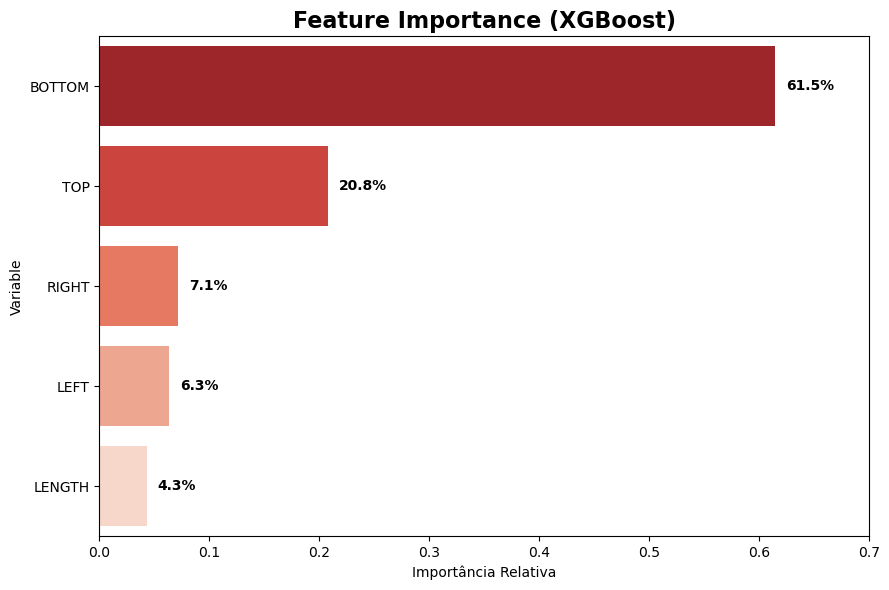

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

var_imp = pd.DataFrame({
    'Variable': ['BOTTOM', 'TOP', 'RIGHT', 'LEFT', 'LENGTH'],
    'Importance': [0.6147, 0.2075, 0.0715, 0.0633, 0.0431]
})

plt.figure(figsize=(9, 6))
ax = sns.barplot(data=var_imp, x='Importance', y='Variable', palette='Reds_r')
plt.title('Feature Importance (XGBoost)', fontsize=16, fontweight='bold')
plt.xlabel('Importância Relativa')
plt.xlim(0, 0.7)

# Adicionar valores nas barras
for i, v in enumerate(var_imp['Importance']):
    ax.text(v + 0.01, i, f"{v:.1%}", va='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [117]:
print("=== SEPARAÇÃO PERFEITA COM BOTTOM ===")
print("BOTTOM para CONTERFEIT = 0:")
print(X_train[y_train == 0]['BOTTOM'].describe())

print("\nBOTTOM para CONTERFEIT = 1:")
print(X_train[y_train == 1]['BOTTOM'].describe())

=== SEPARAÇÃO PERFEITA COM BOTTOM ===
BOTTOM para CONTERFEIT = 0:
count    85.000000
mean      8.295294
std       0.659709
min       7.200000
25%       7.900000
50%       8.200000
75%       8.800000
max      10.400000
Name: BOTTOM, dtype: float64

BOTTOM para CONTERFEIT = 1:
count    85.000000
mean     10.520000
std       1.175727
min       7.400000
25%       9.900000
50%      10.600000
75%      11.400000
max      12.700000
Name: BOTTOM, dtype: float64


# 5. AVALIAR O MODELO

In [118]:
y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
acc = accuracy_score(y_train, y_pred)

print("Matriz:\n", cm)
print(f"Acuracia: {acc*100:.2f}%")

# 4 gráfico da matriz de confusão 


#import seaborn as sns
#plt.figure(figsize=(6, 3))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
#            xticklabels=['Genuína(0)', 'Falsa (1)'],
#            yticklabels=['Genuina(0)', 'Falsa (1)'],
#            cbar=False)


#plt.xlabel('Previsto')
#plt.ylabel('Real')
#plt.title('Matriz de Confusão')

Matriz:
 [[84  1]
 [ 0 85]]
Acuracia: 99.41%


In [119]:
#from sklearn.model_selection import cross_val_score

#scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
#print("Acurácia por fold:", scores)
#print(f"Média: {scores.mean()*100:.2f}% ± {scores.std()*100:.2f}%")


In [120]:
# Treino
y_pred_train = model.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

# Teste
y_pred_test = model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Treino: {acc_train*100:.2f}%")
print(f"Teste:  {acc_test*100:.2f}%")

Treino: 99.41%
Teste:  100.00%


In [121]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[[84  1]
 [ 0 85]]
Acurácia: 99.41%


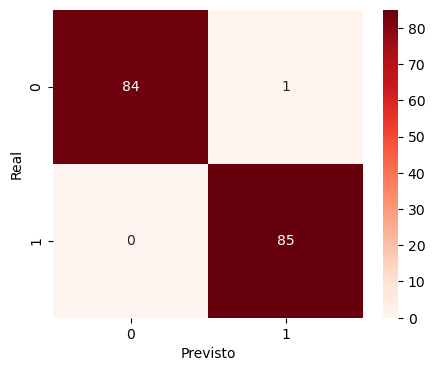

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
acc = accuracy_score(y_train, y_pred)

print(cm)
print(f"Acurácia: {acc*100:.2f}%")

# Gráfico
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [124]:
#VAMOS SALVAR O MODELO 

model.save_model('dectector_notas_nelson.json')

print('Modelo salvo como dectector_notas_nelson.json ')

Modelo salvo como dectector_notas_nelson.json 


In [131]:
#vamos testar se o modelo salvou corretamente 

# CARREGAR MODELO SALVO 

model_carregado = xgb.XGBClassifier()

model_carregado.load_model('dectector_notas_nelson.json')
nota_teste = [[214.8, 130.0, 130.0, 10.5, 11.0]]  # LENGTH, LEFT, RIGHT, BOTTOM, TOP
pred = model_carregado.predict(nota_teste)[0]
prob = model_carregado.predict_proba(nota_teste)[0]

print(f"Previsão: {'FALSA' if pred == 1 else 'GENUÍNA'}")
print(f"Chance de ser FALSA: {prob[1]:.1%}")


Previsão: FALSA
Chance de ser FALSA: 99.5%
